In [56]:
from __future__ import division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
# Пример как расходуется бюджет без алгоритма
data = []
budget = 105000
days = 30
dailybudget = budget / days
total_spent = 0
for day in xrange(0,days):
    daily_spent_bias_share = np.random.uniform(low=0.0, high=0.3)
    if np.random.uniform(low=0.0, high=1.0) > 0.5:
        daily_spent_bias_share = -daily_spent_bias_share
    spent = dailybudget * (1 + daily_spent_bias_share)
    total_spent += spent
    print day+1,daily_spent_bias_share,spent,total_spent

1 -0.188529473374 2840.14684319 2840.14684319
2 0.158399796311 4054.39928709 6894.54613028
3 0.208638691796 4230.23542129 11124.7815516
4 0.0181670868614 3563.58480401 14688.3663556
5 -0.217480216759 2738.81924134 17427.1855969
6 -0.006708791828 3476.5192286 20903.7048255
7 -0.126677625779 3056.62830977 23960.3331353
8 0.00734683332847 3525.71391665 27486.0470519
9 0.19280153489 4174.80537212 31660.8524241
10 0.0349647480364 3622.37661813 35283.2290422
11 -0.0440371494824 3345.86997681 38629.099019
12 -0.0329648268338 3384.62310608 42013.7221251
13 -0.209791303128 2765.73043905 44779.4525641
14 -0.162413793603 2931.55172239 47711.0042865
15 0.0831826898158 3791.13941436 51502.1437009
16 0.062677371027 3719.37079859 55221.5144995
17 -0.285176895324 2501.88086637 57723.3953658
18 -0.0025947950472 3490.91821733 61214.3135832
19 0.280907726581 4483.17704303 65697.4906262
20 0.234300644803 4320.05225681 70017.542883
21 0.296681196724 4538.38418853 74555.9270716
22 -0.225453176603 2710.91388

In [134]:
def calcBudgetInfo(budget,days,current_total_spent,days_left,previous_dailybudget,previous_day_spent):
    balance = budget - current_total_spent # Считаем остаток = бюджет - текущие суммарные расходы
    estimated_dailybudget = balance / days_left # Определяем дневной бюджет
    denominator = previous_day_spent / previous_dailybudget # Считаем погрешность между предыдущим дневным бюджетом и расходом предыдущего дня
    dailybudget = estimated_dailybudget/denominator # Корректируем дневной бюджет с учетом погрешности
    monthbudget = dailybudget * days
    debbuging_data = {'balance':balance,'estimated_dailybudget':estimated_dailybudget,'denominator':denominator,'monthbudget':monthbudget}
    return {'debbuging_data':debbuging_data,'dailybudget':dailybudget}

# Пример как расходуется бюджет с алгоритмом
data = []
budget = 105000 # Бюджет, который надо потратить
days = 30 # Количество дней, за которые надо потратить бюджет
dailybudget = budget / days # Стартовый дневной бюджет проекта
total_spent = 0 # Израсходовано средств
for day in xrange(0,days):
    daily_spent_bias_share = np.random.uniform(low=-0.15, high=0.15) # Генерируем случайный шум от -30% до +30%
    spent = dailybudget * (1 + daily_spent_bias_share) # Дневной расход = дневной бюджет + шум
    total_spent += spent # Считаем накопленный расход
    days_left = days-day-1 # Считаем количество оставшихся дней
    previous_dailybudget = dailybudget # Предыдущий дневной бюджет 
    if days_left != 0:
        budgetInfo = calcBudgetInfo(budget,days,total_spent,days_left,previous_dailybudget,spent) # Считаем бюджет
        dailybudget = budgetInfo['dailybudget'] # Определяем новый дневной бюджет с учетом корректировок
    data.append({'day':day+1,
                'daily spent bias share':daily_spent_bias_share,
                'previous dailybudget':previous_dailybudget,
                'dailybudget':budgetInfo['dailybudget'],
                'spent':spent,
                'total spent':total_spent,
                'balance':budgetInfo['debbuging_data']['balance'],
                'days left':days_left,
                'estimated dailybudget':budgetInfo['debbuging_data']['estimated_dailybudget'],
                'denominator':budgetInfo['debbuging_data']['denominator'],
                'monthbudget':budgetInfo['debbuging_data']['monthbudget']
                })
df = pd.DataFrame(data)

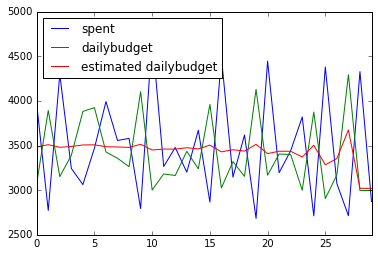

In [135]:
df[['spent','dailybudget','estimated dailybudget']].plot()

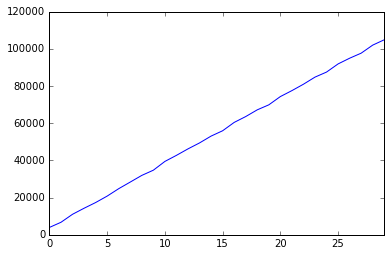

In [136]:
df['total spent'].plot()

In [137]:
df

,balance,daily spent bias share,dailybudget,day,days left,denominator,estimated dailybudget,monthbudget,previous dailybudget,spent,total spent
0,101035.196547,0.132801,3075.537836,1,29,1.132801,3483.972295,92266.135080,3500.000000,3964.803453,3964.803453
1,98262.507046,-0.098470,3892.688440,2,28,0.901530,3509.375252,116780.653196,3075.537836,2772.689501,6737.492954
2,93963.873340,0.104284,3151.493039,3,27,1.104284,3480.143457,94544.791173,3892.688440,4298.633707,11036.126660
3,90720.464747,0.029166,3390.366184,4,26,1.029166,3489.248644,101710.985525,3151.493039,3243.408593,14279.535253
4,87657.777348,-0.096650,3881.453447,5,25,0.903350,3506.311094,116443.603425,3390.366184,3062.687399,17342.222652
5,84188.183243,-0.106110,3924.240418,6,24,0.893890,3507.840968,117727.212543,3881.453447,3469.594105,20811.816757
6,80195.976723,0.017320,3427.420200,7,23,1.017320,3486.781597,102822.606008,3924.240418,3992.206520,24804.023277
7,76639.585150,0.037629,3357.285262,8,22,1.037629,3483.617507,100718.557848,3427.420200,3556.391573,28360.414850
8,73059.907444,0.066242,3262.902824,9,21,1.066242,3479.043212,97887.084735,3357.285262,3579.677706,31940.092556
9,70266.295962,-0.143826,4103.507182,10,20,0.856174,3513.314798,123105.215470,3262.902824,2793.611481,34733.704038


In [133]:
df['monthbudget'].mean()

108064.74781136286